# 0.) Import the Credit Card Fraud Data From CCLE

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("fraudTest.csv")

In [3]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [4]:
df_select = df[["trans_date_trans_time", "category", "amt", "city_pop", "is_fraud"]]

df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]

X = pd.get_dummies(df_select, ["category"]).drop(["trans_date_trans_time", "is_fraud"], axis = 1)
y = df["is_fraud"]

/var/folders/8n/rplm7qjx0qq8gxp74jz2xy680000gn/T/ipykernel_48836/2282180580.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
/var/folders/8n/rplm7qjx0qq8gxp74jz2xy680000gn/T/ipykernel_48836/2282180580.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]


# 1.) Use scikit learn preprocessing to split the data into 70/30 in out of sample

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

In [7]:
X_test, X_holdout, y_test, y_holdout = train_test_split(X_test, y_test, test_size = .5)

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_holdout = scaler.transform(X_holdout)

# 2.) Make three sets of training data (Oversample, Undersample and SMOTE)

In [9]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [10]:
ros = RandomOverSampler()
over_X, over_y = ros.fit_resample(X_train, y_train)

rus = RandomUnderSampler()
under_X, under_y = rus.fit_resample(X_train, y_train)

smote = SMOTE()
smote_X, smote_y = smote.fit_resample(X_train, y_train)

# 3.) Train three logistic regression models

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
over_log = LogisticRegression().fit(over_X, over_y)

under_log = LogisticRegression().fit(under_X, under_y)

smote_log = LogisticRegression().fit(smote_X, smote_y)

# 4.) Test the three models

In [13]:
over_log.score(X_test, y_test)

0.923462655054104

In [14]:
under_log.score(X_test, y_test)

0.9192159120900214

In [15]:
smote_log.score(X_test, y_test)

0.9231867367259291

In [16]:
# We see SMOTE performing with higher accuracy but is ACCURACY really the best measure?

# 5.) Which performed best in Out of Sample metrics?

In [17]:
# Sensitivity here in credit fraud is more important as seen from last class

In [18]:
from sklearn.metrics import confusion_matrix

In [19]:
y_true = y_test

In [20]:
y_pred = over_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[76733,  6301],
       [   79,   245]])

In [21]:
print("Over Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

Over Sample Sensitivity :  0.7561728395061729


In [22]:
y_pred = under_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[76378,  6656],
       [   78,   246]])

In [23]:
print("Under Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

Under Sample Sensitivity :  0.7592592592592593


In [24]:
y_pred = smote_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[76710,  6324],
       [   79,   245]])

In [25]:
print("SMOTE Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

SMOTE Sample Sensitivity :  0.7561728395061729


# 6.) Pick two features and plot the two classes before and after SMOTE.

In [26]:
column_names = X.columns

X_train_df = pd.DataFrame(X_train, columns=column_names)

raw_temp = pd.concat([X_train_df, y_train.reset_index(drop=True)], axis=1)

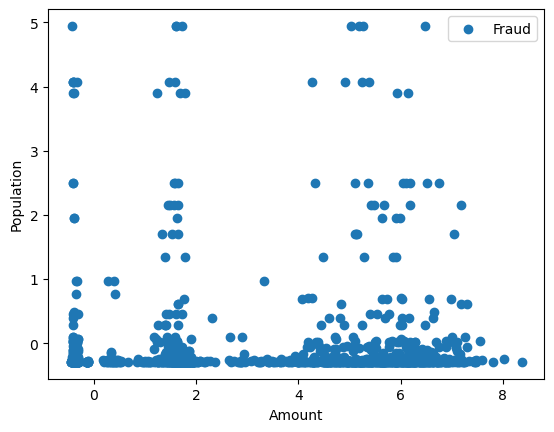

In [27]:
#plt.scatter(raw_temp[raw_temp["is_fraud"] == 0]["amt"], raw_temp[raw_temp["is_fraud"] == 0]["city_pop"])

plt.scatter(raw_temp[raw_temp["is_fraud"] == 1]["amt"], raw_temp[raw_temp["is_fraud"] == 1]["city_pop"])
plt.legend(["Fraud", "Not Fraud"])
plt.xlabel("Amount")
plt.ylabel("Population")

plt.show()

In [28]:
smote_X_df = pd.DataFrame(smote_X, columns=column_names)

raw_temp = pd.concat([smote_X_df, smote_y.reset_index(drop=True)], axis=1)


/Users/zichenxu/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


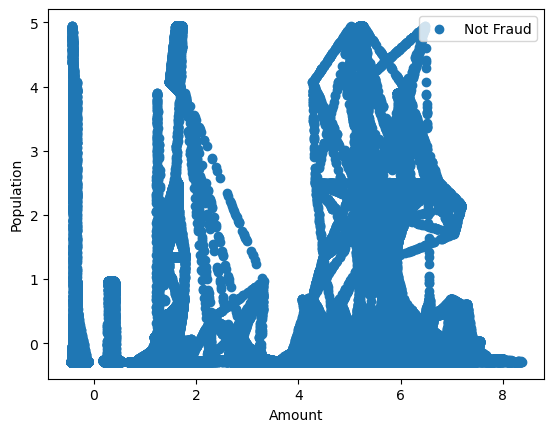

In [29]:
#plt.scatter(raw_temp[raw_temp["is_fraud"] == 0]["amt"], raw_temp[raw_temp["is_fraud"] == 0]["city_pop"])

plt.scatter(raw_temp[raw_temp["is_fraud"] == 1]["amt"], raw_temp[raw_temp["is_fraud"] == 1]["city_pop"])
plt.legend([ "Not Fraud", "Fraud"])
plt.xlabel("Amount")
plt.ylabel("Population")

plt.show()

# 7.) We want to compare oversampling, Undersampling and SMOTE across our 3 models (Logistic Regression, Logistic Regression Lasso and Decision Trees).

# Make a dataframe that has a dual index and 9 Rows.
# Calculate: Sensitivity, Specificity, Precision, Recall and F1 score. for out of sample data.
# Notice any patterns across perfomance for this model. Does one totally out perform the others IE. over/under/smote or does a model perform better DT, Lasso, LR?
# Choose what you think is the best model and why. 

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd

In [31]:
resampling_methods = {
    "over":RandomOverSampler(),
    "under":RandomUnderSampler(),
    "smote": SMOTE()
}

model_configs = {
    "LOG":LogisticRegression(),
    "LASSO":LogisticRegression(penalty = "l1",
                               C = 2.,solver="liblinear"),
    "DTREE":DecisionTreeClassifier()
}

In [32]:
def calc_pref_metric(y_true,y_pred):
    tn,fp,fn,tp = confusion_matrix(y_true,y_pred).ravel()
    
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    precision = precision_score(y_true,y_pred)
    recall = recall_score(y_true,y_pred)
    f1 = f1_score(y_true,y_pred)
    
    return(sensitivity, specificity, precision, recall, f1)

In [33]:
trained_models={}
results = []

In [34]:
for resample_key, resampler in resampling_methods.items():
    resample_X, resample_y = resampler.fit_resample(X_train, y_train)
    
    for model_key, model in model_configs.items():
        combined_key = f"{resample_key}_{model_key}"
        
        m = model.fit(resample_X,resample_y)
        
        trained_models[combined_key] = m
        
        y_pred = m.predict(X_test)
        
        sensitivity, specificity, precision, recall, f1 = calc_pref_metric(y_test, y_pred)
        
        results.append({"Model": combined_key,
                        "Sentitivity": sensitivity,
                        "Specificity": specificity,
                        "Precision": precision,
                        "Recall": recall,
                        "F1": f1})

In [35]:
result_df = pd.DataFrame(results)

In [36]:
result_df

,Model,Sentitivity,Specificity,Precision,Recall,F1
0,over_LOG,0.756173,0.926018,0.038353,0.756173,0.073004
1,over_LASSO,0.756173,0.925874,0.038281,0.756173,0.072873
2,over_DTREE,0.580247,0.998483,0.598726,0.580247,0.589342
3,under_LOG,0.759259,0.932883,0.042275,0.759259,0.080091
4,under_LASSO,0.759259,0.932847,0.042254,0.759259,0.080052
5,under_DTREE,0.950617,0.933184,0.052596,0.950617,0.099676
6,smote_LOG,0.756173,0.923658,0.037211,0.756173,0.070932
7,smote_LASSO,0.756173,0.923670,0.037217,0.756173,0.070943
8,smote_DTREE,0.737654,0.993473,0.306018,0.737654,0.432579


According to the results, there is no one model totally out perform the others. Sensitivity is relatively high for models using under-sampling, with under-sampling Decision Tree showing the highest sensitivity. Specificity is relatively higher for Decision Trees, with over-sampling Decision Tree showing the highest specificity. Precision is relatively higher for Decision Trees, with over-sampling Decision Tree showing the highest precision. Recall varies across models as Logistic Regression and LASSO perform similarly, and Decision Tree performs best using under-sampling and perform sworst using over-sampling. F1 Score is generally higher for Decision Tree models, with over-sampling Decision Tree showing the highest F1 score of all models.

In my opinion, the Smote Decision Tree model appears to be the best choice. It offers a very good balance between Sensitivity and Precision, as reflected in the higher F1 score. The model is more effective at correctly identifying both fraudulent and legitimate transactions compared to the other models. 